In [1]:
import pandas as pd

df = pd.read_csv('../data/test.csv')
df = df[df['description'].notnull()]

In [2]:
## description cleaning

import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

df['description'] = df['description'].apply(cleanhtml)

In [3]:
df['key_skills']

0                                                      NaN
1                                                      NaN
2        {"Работа в команде","Работа в условиях многоза...
3        {Стрессоустойчивость,Ответственность,Коммуника...
4        {"Работа в команде","Умение работать в команде...
                               ...                        
49995    {"Пользователь ПК",Инвентаризация,"Складской У...
49996    {"Ведение отчетности","Учет материалов","Докум...
49997    {"Ведение отчетности","Учет материалов","Докум...
49998    {"Ведение отчетности","Учет материалов","Докум...
49999    {"Грамотная речь","Деловой этикет","Прием посе...
Name: key_skills, Length: 49550, dtype: object

In [4]:
df['key_skills'] = df['key_skills'].fillna('')
df['key_skills'] = df['key_skills'].str.replace('{','').str.replace('}','').str.replace('"','')
df['key_skills_list'] = df['key_skills'].str.split(',')

/tmp/ipykernel_90212/41056613.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['key_skills'] = df['key_skills'].str.replace('{','').str.replace('}','').str.replace('"','')


## Задачи
* Сколько в среднем пишут ключевых навыков в вакансиях: медиана+гистограмма
* Как часто в них остаются пропуски: процент 
* Какой длины(колчиество слов) обычно описания: медиана+гистограмма

In [13]:
import matplotlib.pyplot as plt

## Сколько в среднем пишут ключевых навыков в вакансиях

Всего вакансий в сэмпле датасета 50тыс.

4.0

Text(7, 11000, 'Медиана = 4.0')

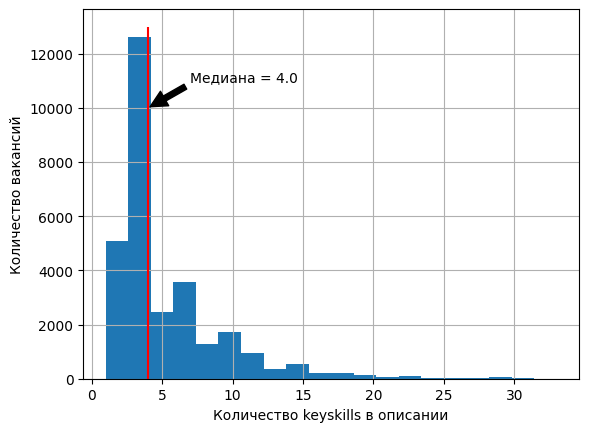

In [68]:
fig, ax = plt.subplots()
# ax.plot(bins, y, '--', color ='black')



key_skills_num = df['key_skills_list'].apply(len)-1
key_skills_num_notnull = key_skills_num[key_skills_num>0]
key_skills_num_notnull.hist(bins = 20)
median = key_skills_num_notnull.median()

ax.set_xlabel('Количество keyskills в описании')
ax.set_ylabel('Количество вакансий')
ax.vlines(4,  0, 13000, color = 'r')
plt.annotate(f"Медиана = {median}", xy=(4, 10000), xytext=(7, 11000),
            arrowprops=dict(facecolor='black', shrink=0.05))

<AxesSubplot: label='Количество keyskills в описании', ylabel='key_skills_list'>

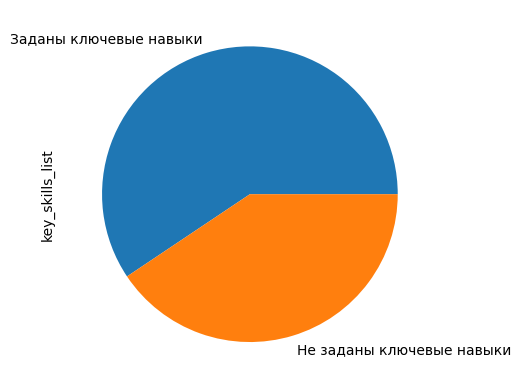

In [73]:
fig, ax = plt.subplots()
ax.set_label('Количество keyskills в описании')


key_skills_num[key_skills_num>0] = 1
key_skills_for_pie = key_skills_num.replace({0:'Не заданы ключевые навыки', 1:'Заданы ключевые навыки'}).value_counts()
key_skills_for_pie.plot(kind='pie')

In [46]:
key_skills_num

0        0
1        0
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: key_skills_list, Length: 49550, dtype: int64

ModuleNotFoundError: No module named 'matplotlib'

In [53]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 11.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
